
![](https://www.kaggle.com/static/images/site-logo.png)



The Titanic Survival Prediction project involves building a predictive model to determine whether a passenger would have survived the Titanic disaster based on various features like age, gender, ticket class, etc. The project includes stages such as data preprocessing, exploratory data analysis (EDA), feature engineering, and machine learning. Algorithms such as logistic regression, decision trees, or random forests are typically employed for prediction. The aim is to analyze the dataset, extract meaningful insights, engineer relevant features, and train a model that accurately predicts survival outcomes.








# Author by: Najeeb uallah
# Date: 2021-03-21
# **Project: Titanic Survival Prediction**


In [69]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels 
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

# Load data set from pandas library

In [70]:
# load dataset 
df = pd.read_csv("tested.csv")


# **Data Exploration**
<hr> EDA (Exploratory Data Analysis) is a process where we tend to analyze the data and summarize the main characteristics of the data. It often employs data visualization methods to discover patterns and relationships in the data. In this section, we will perform the following operations:


### **1. Data Description:**
- **PassengerId:** Unique Id of a passenger. (int64)
- **Survived:** Whether the passenger survived or not. (int64)
    - 0 = Not survived
    - 1 = Survived
    - NaN = Unknown
    -  **Target Variable**
    -  
    -  


In [71]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [72]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [74]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [75]:
df.shape

(418, 12)

# **Missing Vlues in the dataset**

In [76]:
df.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

# **Impute Missing Values using mean method**

In [77]:

df['Age'] = df['Age'].fillna(df['Age'].mean())
df.isnull().sum().sort_values(ascending=False)


df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df.isnull().sum().sort_values(ascending=False)


Cabin          327
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

# **Drop the cabin column because it has too many missing values** (above 75%)

In [78]:
# drop cabin columns

df.drop(['Cabin'], axis=1, inplace=True)
df.isnull().sum().sort_values(ascending=False)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# **Check the Unique values in the dataset and mostly columns**

In [79]:
df.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             80
SibSp            7
Parch            8
Ticket         363
Fare           170
Embarked         3
dtype: int64

In [80]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [81]:
df['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [82]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

# **Survived with Pclass mean**
 The relationship between Survived and Pclass.survival rate is higher in the 3rd class.


In [83]:

df.groupby(['Pclass'])['Survived'].mean()


Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64

# **Max and Min Age in the dataset**
Max is 76 and Min is 0.17 years old.

In [84]:
df['Age'].max()

76.0

In [85]:
df['Age'].min()

0.17

In [86]:
df['Age'].unique()

array([34.5       , 47.        , 62.        , 27.        , 22.        ,
       14.        , 30.        , 26.        , 18.        , 21.        ,
       30.27259036, 46.        , 23.        , 63.        , 24.        ,
       35.        , 45.        , 55.        ,  9.        , 48.        ,
       50.        , 22.5       , 41.        , 33.        , 18.5       ,
       25.        , 39.        , 60.        , 36.        , 20.        ,
       28.        , 10.        , 17.        , 32.        , 13.        ,
       31.        , 29.        , 28.5       , 32.5       ,  6.        ,
       67.        , 49.        ,  2.        , 76.        , 43.        ,
       16.        ,  1.        , 12.        , 42.        , 53.        ,
       26.5       , 40.        , 61.        , 60.5       ,  7.        ,
       15.        , 54.        , 64.        , 37.        , 34.        ,
       11.5       ,  8.        ,  0.33      , 38.        , 57.        ,
       40.5       ,  0.92      , 19.        , 36.5       ,  0.75


# **Create a new column AgeGroup and add the bins and labels in the dataset**
# **Check the unique values in the AgeGroup column**



In [87]:
bins = [0,5,10,15,18,40,76]
labels = ["0-5","6-10","11-15","16-18","18-40","41-76"]
# add new column
df["age_group"] = pd.cut(df["Age"],bins= bins ,labels=labels)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,18-40
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,41-76
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,41-76
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,18-40
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,18-40


In [88]:
df['age_group'].value_counts()

age_group
18-40    287
41-76     77
16-18     22
0-5       12
6-10      10
11-15     10
Name: count, dtype: int64

# **Visualization**

`age_group`,~`survived`, barplot,

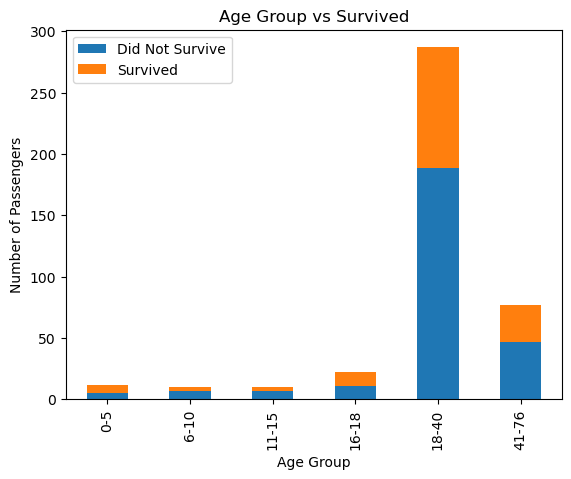

In [89]:
# age group vs survived
df.groupby("age_group")['Survived'].value_counts().unstack().plot(kind="bar",stacked=True)
plt.title('Age Group vs Survived')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.legend(['Did Not Survive', 'Survived'])
plt.show()

# **check the relationship between sex and age_group**



In [90]:
df.groupby("Sex")['age_group'].value_counts().unstack()

age_group,0-5,6-10,11-15,16-18,18-40,41-76
Sex,,,,,,
female,7,3,3,11,98,30
male,5,7,7,11,189,47


In [91]:
df.groupby("Sex")[['Survived',"Sex"]].value_counts().unstack()

Survived,0,1
Sex,,
female,NaN,152.0
male,266.0,NaN


# **Check the relationship between pclass,sex and survived  in Titanic dataset**

In [92]:

df.groupby(["Pclass","Sex"])['Survived'].value_counts()


Pclass  Sex     Survived
1       female  1            50
        male    0            57
2       female  1            30
        male    0            63
3       female  1            72
        male    0           146
Name: count, dtype: int64

# **using pivot table to check the relationship between pclass,sex and survived**

In [93]:
df.pivot_table(index='Pclass', columns='age_group', values='Survived')


age_group,0-5,6-10,11-15,16-18,18-40,41-76
Pclass,,,,,,
1,NaN,0.000000,0.00,0.666667,0.489796,0.45283
2,0.666667,0.500000,0.75,0.250000,0.312500,0.18750
3,0.555556,0.285714,0.00,0.533333,0.310345,0.37500


# **check the relationship between pclass,sex**
How many pessenger in each pclass and sex in the dataset. 



In [94]:
# survived  male and female from pclass 

df.groupby("Pclass")['Sex'].value_counts().unstack()


Sex,female,male
Pclass,,
1,50,57
2,30,63
3,72,146


# **Visualization**

`pclass`,~`sex`, barplot

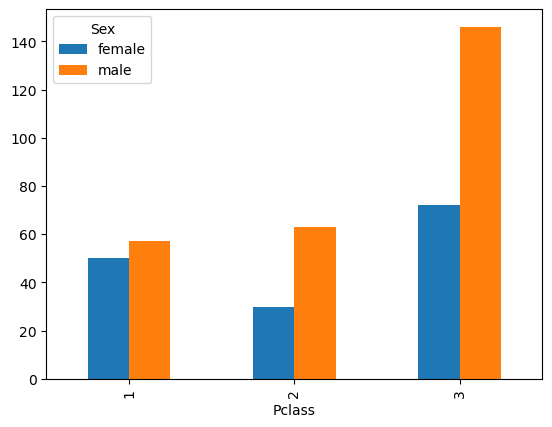

In [95]:

df.groupby ("Pclass")['Sex'].value_counts().unstack().plot(kind="bar")
plt.show()




In [96]:
df.groupby("Pclass")['Survived'].value_counts().unstack()

Survived,0,1
Pclass,,
1,57,50
2,63,30
3,146,72


In [97]:
corr = df[['Age',"Fare"]].corr()
corr

,Age,Fare
Age,1.0000,0.3268
Fare,0.3268,1.0000


<Axes: xlabel='Age', ylabel='Fare'>

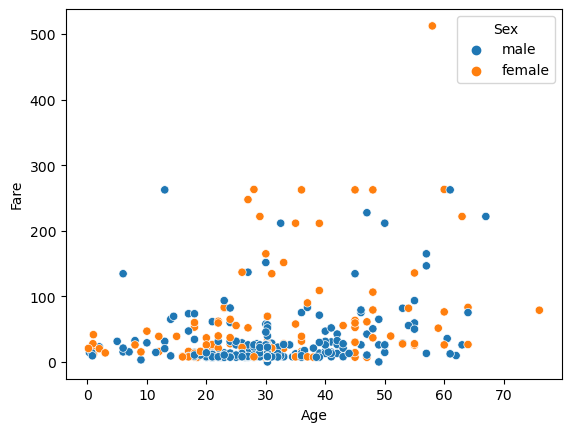

In [98]:
sns.scatterplot (data=df ,x= 'Age',y= 'Fare',hue="Sex")


<Axes: xlabel='Age', ylabel='Count'>

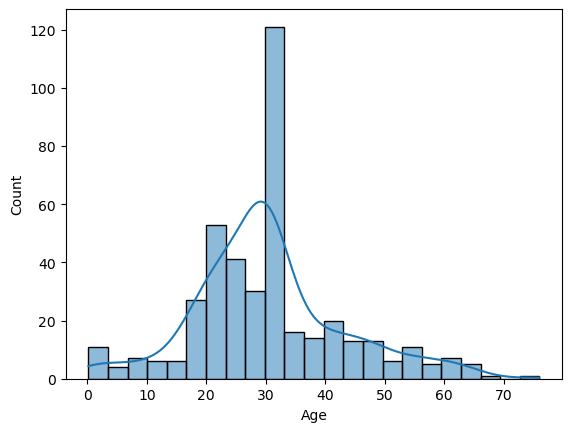

In [99]:
sns.histplot(df,x="Age",kde=True )

In [100]:
# boxplot using plotly 
import plotly.express as px
fig = px.box(df, x="Sex", y="Fare", color="Survived", notched=True)
fig.show()


In [101]:
import plotly.express as px

fig = px.scatter(df, x="Age", y="Fare", color="Survived", trendline="ols", title="Age vs Fare with stat model")
fig.show()


In [102]:
#hist plot using plotly 
fig = px.histogram(df, x="Fare", color="Survived", histnorm='percent', title="Fare vs Survived")
fig.show()

In [103]:
df["Ticket"].nunique()

363

In [104]:
print(f"{df.groupby('Ticket')['Survived'].sum().loc[df.groupby('Ticket')['Survived'].sum()==1].count()/df['Ticket'].nunique()*100:.2f}%")

34.99%


In [105]:
# how many pessenger who did not survive
print(f"{df.groupby('Ticket')['Survived'].sum().loc[df.groupby('Ticket')['Survived'].sum()==0].count()/df['Ticket'].nunique()*100:.2f}%") 

61.71%


In [106]:
df['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

# Survived and Unsurvived with Ticket Numbers `Female`

In [107]:
print(f"{df.loc[(df['Sex']=='female') & (df['Survived']==1)]['Ticket'].nunique()/df['Ticket'].nunique()*100:.2f}%")


38.29%


In [108]:
print(f"{df.loc[(df['Sex']=='female') & (df['Survived']==0)]['Ticket'].nunique()/df['Ticket'].nunique()*100:.2f}%")


0.00%


# Survived and Unsurvived with Ticket Numbers `Male`

In [109]:
print(f"{df.loc[(df['Sex']=='male') & (df['Survived']==1)]['Ticket'].nunique()/df['Ticket'].nunique()*100:.2f}%")


0.00%


In [110]:
print(f"{df.loc[(df['Sex']=='male') & (df['Survived']==0)]['Ticket'].nunique()/df['Ticket'].nunique()*100:.2f}%")


68.87%


# **pessenger Who Survived With Ticket Numbers**  `histogram Female`

In [111]:
# how many female pessenger who did not survive using plot
fig = px.histogram(df.loc[(df['Sex']=='female') & (df['Survived']==1)], x="Ticket", color="Survived", histnorm='percent', title="Female pessenger who survive")
fig.show()



# **pessenger who Did Not Survived With Ticket Numbers** ` histogram Male`

In [112]:
fig = px.histogram(df.loc[(df['Sex']=='male') & (df['Survived']==0)], x="Ticket", color="Survived", histnorm='percent', title="Male pessenger who did not survive")
fig.show()


# **Survived with age_group**

In [113]:
df.groupby("age_group")['Survived'].value_counts().unstack()


Survived,0,1
age_group,,
0-5,5,7
6-10,7,3
11-15,7,3
16-18,11,11
18-40,189,98
41-76,47,30


# **Survived with age_group and sex**

<Axes: xlabel='age_group,Sex'>

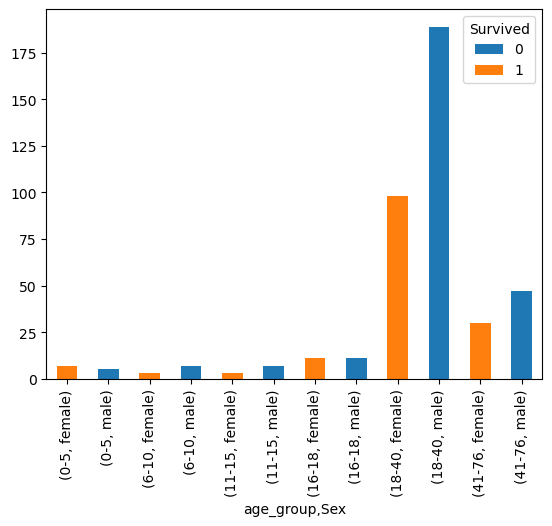

In [114]:
# check the age group who survived male and female 

df.groupby("age_group")[['Sex','Survived']].value_counts().unstack().plot(kind="bar",stacked=True)



# **Age Group vs Survived** (barPlot)

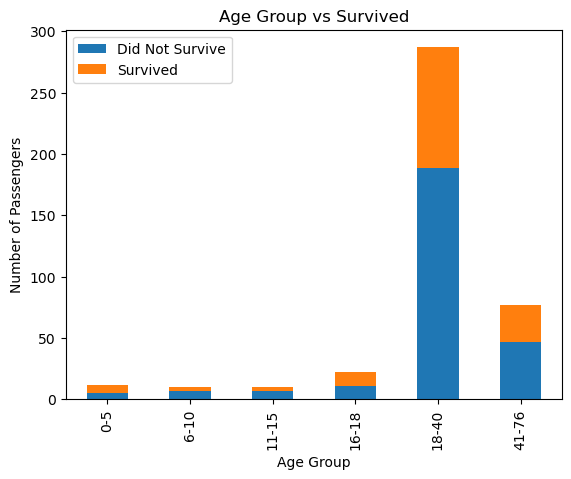

In [115]:
df.groupby("age_group")['Survived'].value_counts().unstack().plot(kind="bar",stacked=True)
plt.title('Age Group vs Survived')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.legend(['Did Not Survive', 'Survived'])
plt.show()

# **Age Group vs Survived and sex** (barPlot)

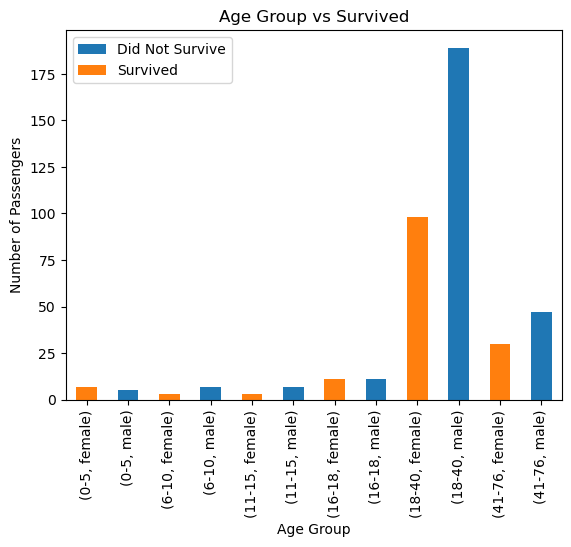

In [116]:
df.groupby("age_group")[['Sex','Survived']].value_counts().unstack().plot(kind="bar",stacked=True)
plt.title('Age Group vs Survived')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.legend(['Did Not Survive', 'Survived'])
plt.show()


# **Survived with Sibsp mean**

In [117]:
# how many sibsp  who did not survive
print(f"{df.groupby('SibSp')['Survived'].sum().loc[df.groupby('SibSp')['Survived'].sum()==1].count()/df['SibSp'].nunique()*100:.2f}%")

57.14%


# **Survived Sibsp with  histplot**

In [118]:

fig = px.histogram(df.loc[(df['SibSp']>1) & (df['Survived']==1)], x="SibSp", color="Survived", histnorm='percent', 
title="SibSp who  survive")
fig.show()


In [119]:
# how many sibsp who survive with age_group 
fig = px.box(df.loc[(df['SibSp']>0) & (df['Survived']==0)], x="SibSp", y="Age", color="Survived", facet_row="Pclass", title="SibSp who  survive with age_group")
fig.show()


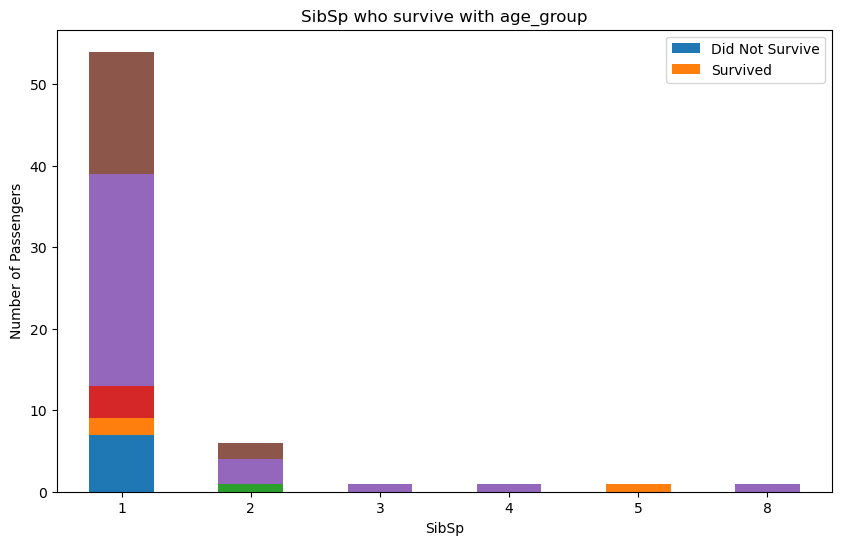

In [120]:
# how many sibsp who survive with age_group using matplotlib
fig, ax = plt.subplots(figsize=(10,6))
df.loc[(df['SibSp']>0) & (df['Survived']==1)].groupby('SibSp')['age_group'].value_counts().unstack().plot(kind='bar', stacked=True, ax=ax, rot=0)
ax.set_title("SibSp who survive with age_group")
ax.set_xlabel("SibSp")
ax.set_ylabel("Number of Passengers")
ax.legend(['Did Not Survive', 'Survived'])
plt.show()



In [121]:
# how many sibsp who survive with age_group 

fig = px.box(df.loc[(df['SibSp']>0) & (df['Survived']==1)], x="SibSp", y="Embarked", color="Survived", facet_row="Pclass", title="SibSp who  survive with Embarked")
fig.show()


# **Age Group vs Embarked and sex**

```python
check the age group who Embarked male and female in the dataset
```


In [122]:
df.groupby("age_group")[['Embarked','Sex']].value_counts().unstack()  


Sex                 female  male
age_group Embarked              
0-5       C              1     0
          Q              0     0
          S              6     5
6-10      C              1     3
          Q              0     1
          S              2     3
11-15     C              0     1
          Q              0     0
          S              3     6
16-18     C              2     1
          Q              2     0
          S              7    10
18-40     C             21    42
          Q             22    19
          S             55   128
41-76     C             15    15
          Q              0     2
          S             15    30

#  **Age Group vs Embarked and sex** (barPlot)

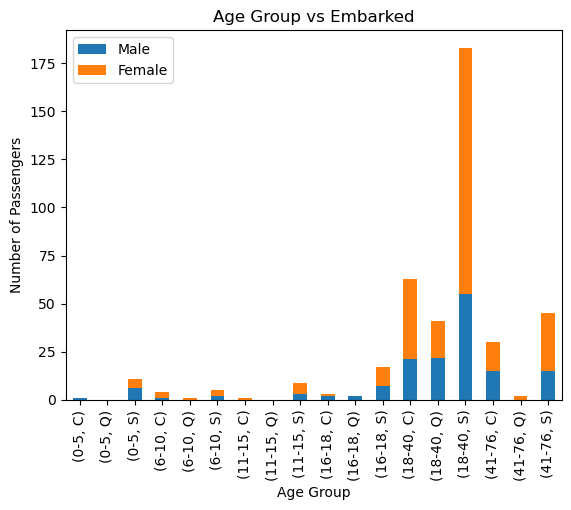

In [123]:

df.groupby("age_group")[['Embarked','Sex']].value_counts().unstack().plot(kind="bar",stacked=True)
plt.title('Age Group vs Embarked')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.legend(['Male', 'Female'])
plt.show()



# **Survived 0r Not Survived from Embarked and age_group**



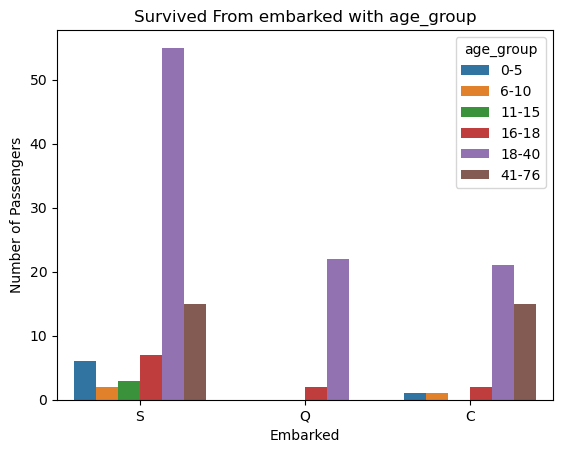

In [124]:
sns.countplot(data=df.loc[(df['Survived']==1)],x="Embarked",hue="age_group")
plt.title('Survived From embarked with age_group')
plt.xlabel('Embarked')
plt.ylabel('Number of Passengers')
plt.show()


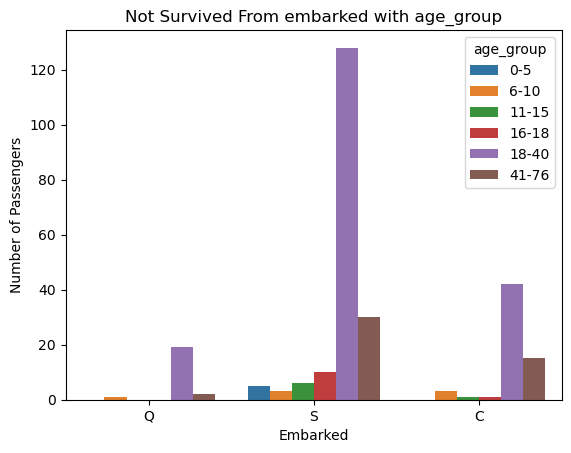

In [125]:

sns.countplot(data=df.loc[(df['Survived']==0)],x="Embarked",hue="age_group")
plt.title('Not Survived From embarked with age_group')
plt.xlabel('Embarked')
plt.ylabel('Number of Passengers')
plt.show()



In [126]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'age_group'],
      dtype='object')

# **Feature Engineering**
### Introduction to Feature Engineering in Python

- **Feature Engineering** is the process of transforming raw data into meaningful features that help in making better predictions. In this section, we will perform the following operations:
  - Add family size as a new attribute.
  - Add whether the passenger is alone as a new attribute.

In [141]:
# feature engineering
df['Family'] = df['SibSp'] + df['Parch'] +1
    # Add family size as a new attribute.
df['IsAlone'] = (df['Family'] == 1).astype(int)  # Add whether the passenger is alone as a new attribute.
df.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group,Family,IsAlone
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q,18-40,1,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S,41-76,2,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q,41-76,1,1
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S,18-40,1,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S,18-40,3,0
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.00000,0,0,7538,9.2250,S,11-15,1,1
6,898,1,3,"Connolly, Miss. Kate",female,30.00000,0,0,330972,7.6292,Q,18-40,1,1
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.00000,1,1,248738,29.0000,S,18-40,3,0
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00000,0,0,2657,7.2292,C,16-18,1,1
9,901,0,3,"Davies, Mr. John Samuel",male,21.00000,2,0,A/4 48871,24.1500,S,18-40,3,0


In [128]:
# data type
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked         object
age_group      category
Family            int64
IsAlone           int32
dtype: object

# **family are survived**



In [129]:
# how many family are survived 
print(f"{df.groupby('Family')['Survived'].sum().loc[df.groupby('Family')['Survived'].sum()==1].count()/df['Family'].nunique()*100:.2f}%")



22.22%


100.00%


In [131]:
# now i  want to see how many  family are survived with pclass
print(f"{df.groupby(['Family', 'Pclass'])['Survived'].sum().loc[df.groupby(['Family', 'Pclass'])['Survived'].sum()==1].count()/df.groupby(['Family', 'Pclass'])['Survived'].sum().count()*100:.2f}%")


26.32%


In [132]:
# now i  want to see how many  family are pclass
print(f"{df.groupby(['Family', 'Pclass'])['Pclass'].count().loc[df.groupby(['Family', 'Pclass'])['Pclass'].count()>1].count()/df.groupby(['Family', 'Pclass'])['Pclass'].count().count()*100:.2f}%")


94.74%


In [133]:
# now i  want to see how many pessenger are survived with family size


fig = px.box(df.loc[(df['Family']>1) & (df['Survived']==1)], x="Family", y="Embarked", color="Survived", facet_row="Pclass", title="Family who survive with Embarked")
fig.show()


In [134]:
# how many pessenger Isalone 
df['IsAlone'].value_counts()


IsAlone
0    344
1     74
Name: count, dtype: int64

In [147]:
# how many pessenger Isalone 
print(f"{df.loc[df['IsAlone']==1]['IsAlone'].count()/df['IsAlone'].count()*100:.2f}%")


60.53%


In [ ]:
df['Age_Bin'] = pd.cut(df['Age'], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80], labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])  # Add age bin as a new attribute.
df['Fare_Bin'] = pd.qcut(df['Fare'], q=4, labels=[0, 1, 2, 3])  # Add fare bin as a new attribute.
df['AgeState'] = df.groupby('Age_Bin')['Survived'].transform('mean')  # Add age state as a new attribute.
df['Gender_Type'] = df.groupby('Sex')['Survived'].transform('mean')  # Add gender type as a new attribute.
df.head(10)
